<a href="https://colab.research.google.com/github/jz3876/jz3876.github.io/blob/main/Final_Project_Intro_Text_Analysis_TFIDF_LDA_Inaugurals_JienaZheng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Intro to Text Analysis in Python: FreqDist → TF–IDF → Topic Modeling (U.S. Inaugural Addresses)

**Course**: Intro to Text Analysis for Public Policy  
**Format**: Live coding (~2.5 hours) + 60‑min student-driven scavenger hunt  
**Dataset**: U.S. Presidential Inaugural Addresses (via NLTK)

### Learning Outcomes
- Load and lightly clean a real-world corpus.
- Contrast **raw frequency (FreqDist)** vs **TF–IDF** to understand term salience.
- Use **topic modeling (LDA, scikit‑learn)** to uncover corpus‑level themes.
- Compare and interpret outputs to make policy‑relevant claims.


## 🔍 Comparing TF–IDF vs Topic Modeling in Policy Contexts

| Policy Context | What TF–IDF Reveals | What Topic Modeling Reveals | Example Insight |
|----------------|--------------------|-----------------------------|-----------------|
| 🏛 **Legislative & Political Communication** | Distinctive vocabulary by legislator or party (e.g., what makes one member’s rhetoric unique) | Shared themes or issue clusters across speeches (e.g., “healthcare,” “security,” “immigration”) | TF–IDF shows that one senator emphasizes “opioids” while another uses “cybersecurity”; LDA groups all health-related terms into a “public health” topic. |
| 🌐 **Diplomatic & Multilateral Statements** | Country-specific framing of an issue (what each nation stresses) | Global discourse patterns and alliances (how nations group around themes) | TF–IDF highlights Fiji’s use of “loss and damage” vs. the U.S.’s “innovation”; LDA identifies a broader “climate adaptation” topic uniting small island states. |
| 🕊 **NGO & Think-Tank Reports** | Organization-specific keywords that signal focus or mandate | Latent themes that span organizations (e.g., “education policy,” “macroeconomic reform”) | TF–IDF shows UNICEF’s “child rights” language; LDA uncovers cross-agency topics like “financing for development.” |
| 📰 **Media Coverage of Global Policy** | Outlet-specific framing and language choices | Dominant topics in media discourse across sources or time | TF–IDF shows Fox News emphasizes “energy independence,” The Guardian “climate justice”; LDA extracts topics like “energy transition,” “policy negotiations.” |
| ⚖️ **Comparative Policy Texts / Legislation** | Unique legal or regulatory phrasing in each country | Shared or evolving legal concepts across multiple texts | TF–IDF finds Germany stresses “Energiewende”; LDA surfaces a “renewable energy transition” topic appearing in multiple EU laws. |
| 💬 **Public Consultation & Citizen Feedback** | Stakeholder-specific concerns or jargon (e.g., NGOs vs. corporations) | Major themes emerging from thousands of comments | TF–IDF identifies NGOs’ use of “pollution control” vs. industry’s “innovation cost”; LDA clusters all responses into “economic impact,” “environmental justice,” etc. |
| 🧭 **Speeches & Strategic Messaging Over Time** | New or distinctive terms introduced in a given year or presidency | Long-term thematic evolution or cycles in national rhetoric | TF–IDF shows “pandemic” spikes in 2020; LDA reveals enduring topics like “foreign policy,” “domestic economy,” “national security.” |

---

### 🧠 Summary

| Technique | Best For | Analytical Focus |
|------------|-----------|------------------|
| **TF–IDF** | Comparing documents or actors | *“What makes this text distinct?”* |
| **Topic Modeling (LDA)** | Discovering cross-document themes | *“What themes recur across the corpus?”* |

> ✅ Together, they bridge **micro-level distinctiveness** (TF–IDF) and **macro-level patterns** (LDA) — enabling richer analysis of language in policy and diplomacy.


Factiva 2025


## 1) Environment Setup (Colab‑friendly)
Run this once in Colab to install/upgrade packages and download NLTK data.


In [ ]:

# In a fresh runtime (Runtime → Restart runtime), run:
!pip -q install "numpy==2.0.2" "scipy==1.14.1" "scikit-learn>=1.4"
!pip install nltk==3.9.2

import numpy, scipy, sklearn
print("NumPy:", numpy.__version__)     # → 2.0.2
print("SciPy:", scipy.__version__)     # → 1.14.x
print("sklearn:", sklearn.__version__) # ≥ 1.4


import nltk
nltk.download('inaugural')
nltk.download('stopwords')
nltk.download('punkt')
# Some environments expect punkt_tab as well:
nltk.download('punkt_tab')

print("✅ Setup complete.")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 49.1 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.1:
      Successfully uninstalled nltk-3.9.1
NumPy: 2.0.2
SciPy: 1.14.1
sklearn: 1.6.1


[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


✅ Setup complete.


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



## 2) Imports
We use: `nltk` for data & preprocessing, `scikit-learn` for TF–IDF and LDA, `matplotlib/pandas` for exploration.


In [ ]:

import re
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import inaugural, stopwords
from nltk import word_tokenize, FreqDist

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA, LatentDirichletAllocation


# Display all rows and columns (adjust numbers as needed)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Show full text in each cell (no truncation)
pd.set_option('display.max_colwidth', None)

# Expand the display width so wide tables don't wrap
pd.set_option('display.width', 0)

print("✅ Pandas display options set for full view.")

print("✅ Imports loaded.")


✅ Pandas display options set for full view.
✅ Imports loaded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive"



'Application Video.gvid'       'Jiena Resume 20251009.pdf'
'Capital for good.gsheet'      'lab7 (1).md.gdoc'
'Colab Notebooks'	        lab7.md.gdoc
 factiva_final_project_2025    'Meeting Reports'
'GCI暑期实习经验分享会 .pptx'   policy_corpus
 IMG_1882.heic		       'Problem Set 7.gdoc'
 IMG_4666.HEIC		        PYTHON
 IMG_5453.JPG		       'Quant Problem Set 5.gdoc'
 IMG_7728.JPG		       'Questions for WorkonWard.gdoc'
'Jenna Zheng Resume.pdf'       'Text Analysis in Python Final Project.gdoc'
'Jiena Resume 20250930.pdf'    'Untitled video.gvid'
'Jiena Resume 202509.pdf'      '亚太暑期实习分享Panel Discussion.gslides'
'Jiena Resume 20251005.pdf'     肉肉头像.jpg


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks"


'Copy of Copy_of_Intro_Text_Analysis_TFIDF_LDA_Inaugurals.ipynb'
'Copy of Create_spreadsheet_Factiva_data.ipynb'
'Copy of Session1_APIs_WebScraping_Workbook.ipynb'
'Copy of youtube_vader_sentiment_analysis.ipynb'
' Create_spreadsheet_Factiva_data.ipynb'
'final project '
'Project of youtube_vader_sentiment_analysis.ipynb'
 Untitled0.ipynb
 WorkonWard.ipynb


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/final project "


/content/drive/MyDrive/Colab Notebooks/final project 


In [ ]:
import pandas as pd

# 1. Read the whole txt file
with open("factiva.txt", "r", encoding="utf-8") as f:
    raw = f.read()

# 2. Split into individual “documents” (articles)
# 👉 Change this to whatever you actually used:
#    e.g. '\n\n\n', '====', 'ARTICLE_START', etc.
DELIM = "===="          # <-- put your real separator here
docs = [d.strip() for d in raw.split(DELIM) if d.strip()]

print(f"Number of docs: {len(docs)}")

# 3. Build a records list, similar to the inaugural example
records = []
for i, text in enumerate(docs):
    # you can parse more metadata here if it’s in the text
    records.append({
        "doc_id": i,      # like fileid
        "text": text
    })

# 4. Turn into DataFrame
df = pd.DataFrame(records).reset_index(drop=True)
df.head(3)


Number of docs: 1


doc_id  \
0       0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [ ]:
import re
import pandas as pd

with open("factiva.txt", "r", encoding="utf-8") as f:
    raw = f.read()

print(raw[:800])   # quick sanity check


===2025===
<News
The EU must find a regulatory reverse gear
George Bridges
642 words
14 October 2025
Financial Times
FTFT
1; Main
21
English
Copyright 2025 The Financial Times Ltd. All rights reserved. Please do not cut and paste FT articles and redistribute by email or post to the web.
F or two decades, the EU has prided itself on being a regulatory superpower. It was a clever idea: in a world of geopolitical fragmentation, the bloc could project influence through rules rather than armies or subsidies. By setting the standards others must meet to access its vast single market, Europe could export its values, protect consumers and give its companies a first-mover advantage. Regulation was Europe's soft power a tool for global leverage and internal cohesion.

This vision dovetailed neatly w


In [ ]:
import re
import pandas as pd

# 1. Load the raw file
with open("factiva.txt", "r", encoding="utf-8") as f:
    raw = f.read()

lines = raw.splitlines()

# indices of all "===YYYY===" lines
marker_idxs = [i for i, l in enumerate(lines) if l.startswith("===") and l.endswith("===")]

# Section labels where the next line is the title
category_markers = {
    "<News",
    "<Business",
    "<Impact",
    "<Outside the Box",
    "<Mutual Funds Weekly",
}

records = []

for idx in marker_idxs:
    # year from the "===2025===" line
    year = int(lines[idx].strip("=").strip())

    # collect all lines until next marker
    block = []
    j = idx + 1
    while j < len(lines) and not (lines[j].startswith("===") and lines[j].endswith("===")):
        if lines[j].strip():  # skip blank lines
            block.append(lines[j].strip())
        j += 1

    if not block:
        continue

    first = block[0]

    # CASE A: explicit section (News, Business, Impact, etc.)
    if first in category_markers:
        category = first.lstrip("<")
        title = block[1] if len(block) > 1 else ""
        # line after title *might* be author (sometimes there is no author)
        possible_author = block[2] if len(block) > 2 else None
        # if that line looks like "XXX words", don't treat it as author
        if possible_author and re.search(r"\bwords\b", possible_author):
            author = None
            body_start = 2
        else:
            author = possible_author
            body_start = 3

    # CASE B: first line is actually the title (like "<How Climate Policy…")
    else:
        category = None
        title = first.lstrip("<")
        possible_author = block[1] if len(block) > 1 else None
        if possible_author and re.search(r"\bwords\b", possible_author):
            author = None
            body_start = 1
        else:
            author = possible_author
            body_start = 2

    text = "\n".join(block[body_start:])

    records.append({
        "year": year,
        "category": category,
        "title": title,
        "author": author,
        "text": text,
    })

df = pd.DataFrame(records).sort_values("year").reset_index(drop=True)
df[["year", "category", "title", "author"]].head(10)


,year,category,title,author
0,2020,None,How Climate Policy Will Change in 2021,Corinne Purtill
1,2020,Mutual Funds Weekly,News & Commentary,These money and investing tips can help you ride out 2020 and start 2021 on an upswing
2,2020,None,"Analysis: Exchange operators embrace sustainable investing, with an eye on Biden",None
3,2020,Outside the Box,The fund-management industry wants better ESG disclosure — here’s what it says Biden should do,None
4,2021,None,"FOCUS-Slowly, European regulators turn up the heat on greenwashing",None
5,2021,Business,Obstacles remain on pathway to global sustainability standards,Alan Livsey
6,2021,Impact,Inside the brewing fight over the SEC’s ESG enforcement,Susan Antilla
7,2021,None,REUTERS NEXT - Sustainable investors look for profits in fuzzy data,None
8,2021,None,Banking & Finance: Platform Launched To Track ESG Data,Chris Cumming
9,2022,Business,Global scope of EU's greenwashing crackdown spooks Wall Street,Laura Noonan


In [ ]:
df.head()


year             category  \
0  2020                 None   
1  2020  Mutual Funds Weekly   
2  2020                 None   
3  2020      Outside the Box   
4  2021                 None   

                                                                                            title  \
0                                                          How Climate Policy Will Change in 2021   
1                                                                               News & Commentary   
2                Analysis: Exchange operators embrace sustainable investing, with an eye on Biden   
3  The fund-management industry wants better ESG disclosure — here’s what it says Biden should do   
4                              FOCUS-Slowly, European regulators turn up the heat on greenwashing   

                                                                                   author  \
0                                                                         Corinne Purtill   
1  These money and investing tips can help you ride out 2020 and start 2021 on an upswing   
2                                                                                    None   
3                                                                                    None   
4                                                                                    None   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
df_simple = df[["year", "title", "text"]].copy()
df_simple.head()


year  \
0  2020   
1  2020   
2  2020   
3  2020   
4  2021   

                                                                                            title  \
0                                                          How Climate Policy Will Change in 2021   
1                                                                               News & Commentary   
2                Analysis: Exchange operators embrace sustainable investing, with an eye on Biden   
3  The fund-management industry wants better ESG disclosure — here’s what it says Biden should do   
4                              FOCUS-Slowly, European regulators turn up the heat on greenwashing   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 


## 4) Light Preprocessing
Simple, transparent steps:
- lowercase → tokenize → keep alphabetic tokens (len ≥ 3) → remove stopwords  
We also add a small custom stoplist of political boilerplate words.
Here is the correct adapted version for your Factiva corpus:
✅ 1. Use NLTK English stopwords
❗ 2. DO NOT remove “government”, “nation”, etc.
These are meaningful in EU vs. US regulation context.
❗ 3. Add ESG corpus-specific stopwords
Things like “copyright”, “reuters”, “financial times”, “english”, “words” appear in Factiva exports but have no analytic meaning.


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# 1. Rebuild df_simple fresh from the original df
df_simple = df[["year", "title", "text"]].copy()

# 2. Build stopwords
EN_STOP = set(stopwords.words('english'))

# Custom stopwords for Factiva ESG news corpus
CUSTOM_STOP = {
    # Metadata / boilerplate
    'copyright', 'reuters', 'times', 'financial', 'ftft', 'news',
    'english', 'words', 'word',
    'january', 'february', 'march', 'april', 'may', 'june',
    'july', 'august', 'september', 'october', 'november', 'december',

    # Generic journalism artifacts
    'said', 'reporting', 'editor', 'analysis', 'write', 'writing',

    # Section labels
    'impact', 'business', 'weekly', 'commentary',

    # Low-information words
    'new',        # generic "new"
    'year',       # temporal artifact
    'would'       # weak modal verb
}

STOPWORDS = EN_STOP.union(CUSTOM_STOP)

print("year in CUSTOM_STOP:", "year" in CUSTOM_STOP)
print("year in STOPWORDS:", "year" in STOPWORDS)

lemmatizer = WordNetLemmatizer()

def simple_clean_tokens(text):
    text = text.lower()
    tokens = word_tokenize(text)
    clean = []
    for tok in tokens:
        if tok.isalpha() and len(tok) >= 3 and tok not in STOPWORDS:
            lemma = lemmatizer.lemmatize(tok)
            clean.append(lemma)
    return clean

# 3. Apply cleaning from scratch
df_simple["tokens"] = df_simple["text"].apply(simple_clean_tokens)

# Extra safety: brute-force remove any stray "year" or "new" if they slipped through
df_simple["tokens"] = df_simple["tokens"].apply(
    lambda toks: [t for t in toks if t not in {"year", "new"}]
)

df_simple["text_clean"] = df_simple["tokens"].apply(lambda toks: " ".join(toks))
df_simple["n_tokens"] = df_simple["tokens"].apply(len)

print("Sample tokens:", df_simple.loc[0, "tokens"][:25])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


year in CUSTOM_STOP: True
year in STOPWORDS: True
Sample tokens: ['corinne', 'purtill', 'york', 'nytf', 'york', 'web', 'york', 'company', 'right', 'reserved', 'group', 'expert', 'gathered', 'debate', 'prospect', 'white', 'house', 'administration', 'big', 'promise', 'environment', 'joseph', 'biden', 'made', 'action']


In [ ]:
print("year in CUSTOM_STOP:", "year" in CUSTOM_STOP)

STOPWORDS = EN_STOP.union(CUSTOM_STOP)
print("year in STOPWORDS:", "year" in STOPWORDS)


year in CUSTOM_STOP: True
year in STOPWORDS: True



## 5) Quick Exploration
A glance at token counts and frequent words gives intuition before modeling.


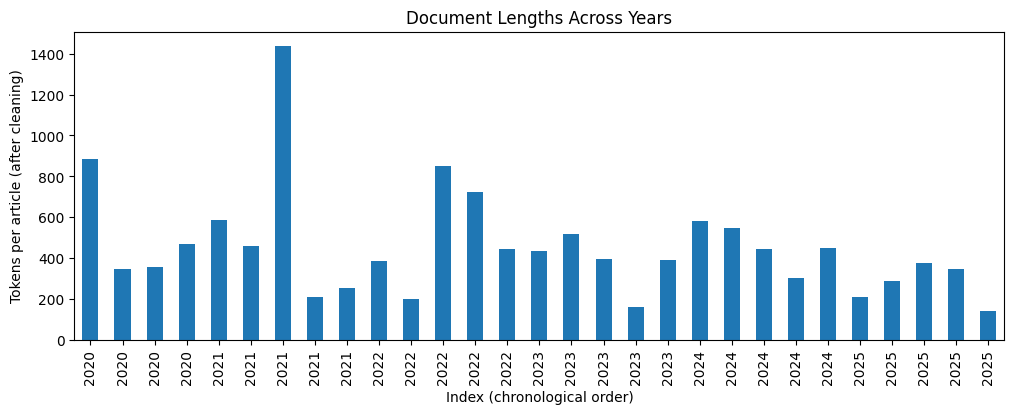

In [ ]:
import matplotlib.pyplot as plt

df_simple['n_tokens'] = df_simple['tokens'].apply(len)

ax = df_simple.plot(
    x='year',
    y='n_tokens',
    kind='bar',
    figsize=(12,4),
    legend=False
)

ax.set_ylabel("Tokens per article (after cleaning)")
ax.set_xlabel("Index (chronological order)")
ax.set_title("Document Lengths Across Years")

plt.show()


1. Document Lengths (Tokens per Article)
Use df_simple, not the old df:

In [ ]:
from collections import Counter
import pandas as pd

all_terms = [t for toks in df_simple['tokens'] for t in toks]
top20 = Counter(all_terms).most_common(20)

pd.DataFrame(top20, columns=['term','count'])


,term,count
0,company,229
1,esg,164
2,climate,146
3,rule,125
4,disclosure,116
5,investor,111
6,sec,91
7,fund,86
8,risk,81
9,standard,78


2. Global Top Terms

In [ ]:
for y in sorted(df_simple["year"].unique()):
    tokens_year = [tok for toks in df_simple[df_simple["year"] == y]["tokens"] for tok in toks]
    counter_year = Counter(tokens_year)

    print(f"\n=== {y} ===")
    display(pd.DataFrame(counter_year.most_common(15), columns=["term","count"]))



=== 2020 ===


,term,count
0,climate,42
1,esg,33
2,company,23
3,biden,19
4,administration,18
5,change,17
6,environmental,17
7,investor,17
8,disclosure,16
9,could,13



=== 2021 ===


,term,count
0,company,70
1,esg,37
2,investor,33
3,sec,29
4,disclosure,28
5,regulator,23
6,public,20
7,standard,19
8,data,19
9,manager,18



=== 2022 ===


,term,count
0,esg,43
1,company,34
2,climate,22
3,rule,22
4,investment,22
5,bank,19
6,say,18
7,disclosure,18
8,global,17
9,fund,16



=== 2023 ===


,term,count
0,fund,37
1,rule,35
2,company,35
3,sustainability,26
4,investor,22
5,esg,22
6,sec,20
7,climate,17
8,market,15
9,change,15



=== 2024 ===


,term,count
0,company,45
1,rule,37
2,disclosure,32
3,climate,29
4,investor,27
5,emission,24
6,standard,23
7,europe,23
8,sec,23
9,risk,21



=== 2025 ===


,term,count
0,company,22
1,climate,21
2,atkins,15
3,regulation,14
4,sec,14
5,rule,14
6,europe,13
7,trump,12
8,corporate,12
9,regulatory,12


3. Top Terms by Year (very useful for theme shifts)

In [ ]:
for y in sorted(df_simple["year"].unique()):
    tokens_year = [tok for toks in df_simple[df_simple["year"] == y]["tokens"] for tok in toks]
    counter_year = Counter(tokens_year)

    print(f"\n=== {y} ===")
    display(pd.DataFrame(counter_year.most_common(15), columns=["term","count"]))



=== 2020 ===


,term,count
0,climate,42
1,esg,33
2,company,23
3,biden,19
4,administration,18
5,change,17
6,environmental,17
7,investor,17
8,disclosure,16
9,could,13



=== 2021 ===


,term,count
0,company,70
1,esg,37
2,investor,33
3,sec,29
4,disclosure,28
5,regulator,23
6,public,20
7,standard,19
8,data,19
9,manager,18



=== 2022 ===


,term,count
0,esg,43
1,company,34
2,climate,22
3,rule,22
4,investment,22
5,bank,19
6,say,18
7,disclosure,18
8,global,17
9,fund,16



=== 2023 ===


,term,count
0,fund,37
1,rule,35
2,company,35
3,sustainability,26
4,investor,22
5,esg,22
6,sec,20
7,climate,17
8,market,15
9,change,15



=== 2024 ===


,term,count
0,company,45
1,rule,37
2,disclosure,32
3,climate,29
4,investor,27
5,emission,24
6,standard,23
7,europe,23
8,sec,23
9,risk,21



=== 2025 ===


,term,count
0,company,22
1,climate,21
2,atkins,15
3,regulation,14
4,sec,14
5,rule,14
6,europe,13
7,trump,12
8,corporate,12
9,regulatory,12


Summary: Your Dataset Captures 6 Distinct ESG Narrative Phases
Year	Dominant Theme	Interpretation
2020	Climate + Biden Transition	ESG = climate policy & political shift
2021	SEC Oversight	ESG becomes a regulatory reporting exercise
2022	Politicization & Backlash	Rules accelerate; ESG becomes contentious
2023	Anti-Greenwashing	Focus on fund labeling & integrity
2024	Emissions & ISSB	Global standardization & Scope 3
2025	Divergence (EU tightens, US rolls back)	ESG enters a geopolitically fragmented era
This structure is perfect for a paper or presentation.


## 5.5) Keyword Frequency (NLTK `FreqDist`) → Why TF–IDF and Visualization
`FreqDist` counts words across the **entire corpus**. High counts may reflect words that are common everywhere—not necessarily distinctive.

**Idea:** Use FreqDist to see the *loudest* words, then use TF–IDF to see the *most distinctive per document*.


TF-IDF matrix shape: (29, 1424)

TF-IDF trend table:


,climate,esg,rule,disclosure,sustainability,regulation
2020,0.139777,0.178717,0.014086,0.068324,0.024921,0.003885
2021,0.039839,0.136590,0.036016,0.071470,0.040000,0.008131
2022,0.070989,0.140936,0.091235,0.077881,0.027427,0.008008
2023,0.063805,0.112800,0.117722,0.041245,0.089418,0.016591
2024,0.089665,0.073166,0.116915,0.097613,0.045090,0.061620
2025,0.101304,0.046568,0.074486,0.044480,0.056117,0.098749


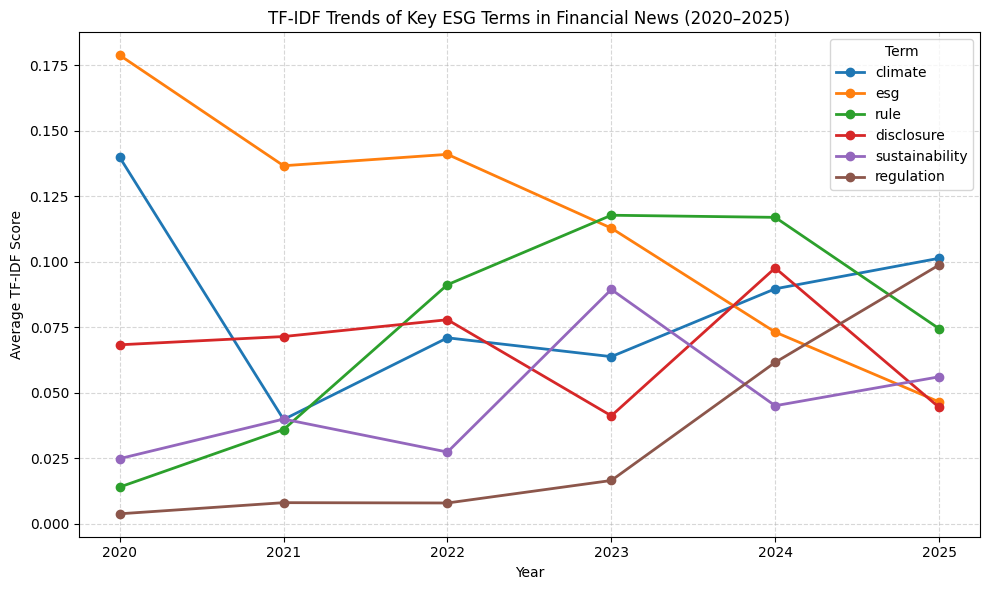

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Prepare texts
texts = df_simple["text_clean"].fillna("")

# 2. Build TF-IDF model over all articles
vectorizer = TfidfVectorizer(
    max_df=0.9,      # ignore very common terms
    min_df=2,        # ignore very rare terms
    ngram_range=(1,1)
)

tfidf = vectorizer.fit_transform(texts)   # shape: (n_docs, n_terms)
vocab = vectorizer.vocabulary_
terms = np.array(vectorizer.get_feature_names_out())

print("TF-IDF matrix shape:", tfidf.shape)

# 3. Choose the 6 core ESG terms to track
keywords = ["climate", "esg", "rule", "disclosure", "sustainability", "regulation"]

years_sorted = sorted(df_simple["year"].unique())
rows = []

for y in years_sorted:
    mask = (df_simple["year"] == y).values
    sub = tfidf[mask]                     # subset of rows for this year
    mean_scores = sub.mean(axis=0).A1     # average TF-IDF per term in that year

    row = {}
    for kw in keywords:
        if kw in vocab:
            idx = vocab[kw]
            row[kw] = mean_scores[idx]
        else:
            row[kw] = 0.0
    rows.append(row)

tfidf_trend_df = pd.DataFrame(rows, index=years_sorted)
print("\nTF-IDF trend table:")
display(tfidf_trend_df)

# 4. Plot TF-IDF trendlines
plt.figure(figsize=(10, 6))

for kw in keywords:
    plt.plot(
        years_sorted,
        tfidf_trend_df[kw],
        marker="o",
        linewidth=2,
        label=kw
    )

plt.title("TF-IDF Trends of Key ESG Terms in Financial News (2020–2025)")
plt.xlabel("Year")
plt.ylabel("Average TF-IDF Score")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Term")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Make sure we're using the cleaned text
texts = df_simple["text_clean"].fillna("")

# 2. Build TF-IDF vectorizer over the whole corpus
vectorizer = TfidfVectorizer(
    max_df=0.9,        # ignore terms that appear in >90% of docs
    min_df=2,          # ignore very rare terms (appear in <2 docs)
    ngram_range=(1,1)  # unigrams only for now
)

tfidf = vectorizer.fit_transform(texts)   # shape: (n_docs, n_terms)
terms = np.array(vectorizer.get_feature_names_out())

print("TF-IDF matrix shape:", tfidf.shape)

# 3. Helper: show top-k TF-IDF terms for a set of row indices
def top_terms_for_rows(row_mask, k=15):
    # row_mask: boolean array or index for rows belonging to a year
    sub = tfidf[row_mask]
    # average tf-idf score per term within this subset
    mean_scores = sub.mean(axis=0).A1
    top_idx = mean_scores.argsort()[::-1][:k]
    return pd.DataFrame({
        "term": terms[top_idx],
        "avg_tfidf": mean_scores[top_idx]
    })

# 4. Top distinctive terms per year
years = sorted(df_simple["year"].unique())
tfidf_by_year = {}  # store for later if needed

for y in years:
    mask = (df_simple["year"] == y).values
    top_df = top_terms_for_rows(mask, k=15)
    tfidf_by_year[y] = top_df

    print(f"\n=== {y} (top 15 by average TF-IDF) ===")
    display(top_df)

# 5. (Optional) Simple heatmap for a few important terms over time
#    Pick some key terms you care about:
focus_terms = ["climate", "esg", "rule", "disclosure", "sustainability", "regulation"]

heat_data = []
for y in years:
    mask = (df_simple["year"] == y).values
    sub = tfidf[mask]
    mean_scores = sub.mean(axis=0).A1

    row = []
    for t in focus_terms:
        if t in vectorizer.vocabulary_:
            idx = vectorizer.vocabulary_[t]
            row.append(mean_scores[idx])
        else:
            row.append(0.0)
    heat_data.append(row)

heat_df = pd.DataFrame(heat_data, index=years, columns=focus_terms)

plt.figure(figsize=(8,4))
plt.imshow(heat_df, aspect="auto", cmap="viridis")
plt.colorbar(label="avg TF-IDF")
plt.xticks(range(len(focus_terms)), focus_terms, rotation=45, ha="right")
plt.yticks(range(len(years)), years)
plt.title("TF-IDF of selected ESG terms by year")
plt.tight_layout()
plt.show()

heat_df


NameError: name 'df_simple' is not defined

Trending ESG Keywords by Year (Line Chart)

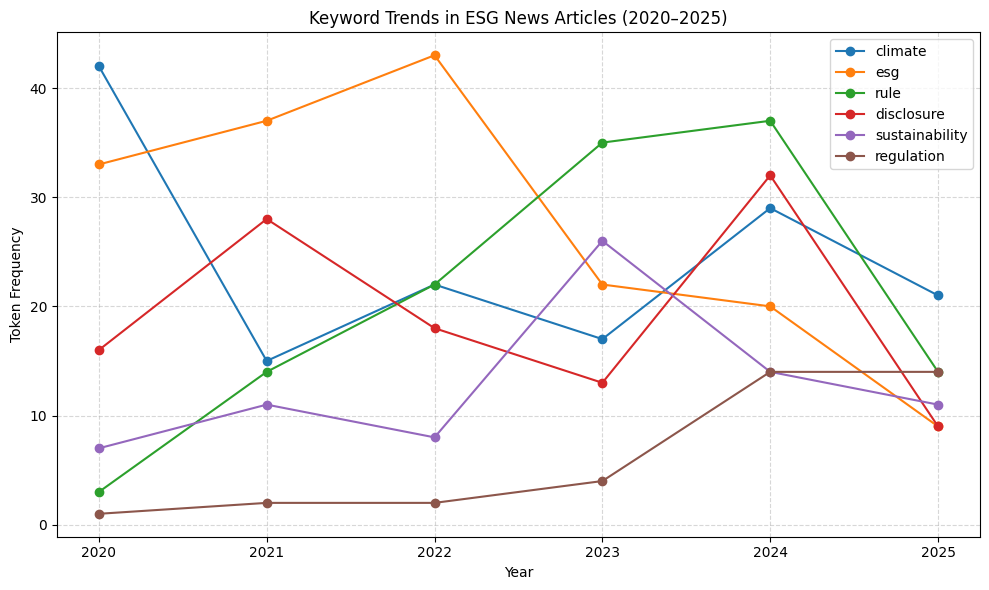

,climate,esg,rule,disclosure,sustainability,regulation
2020,42,33,3,16,7,1
2021,15,37,14,28,11,2
2022,22,43,22,18,8,2
2023,17,22,35,13,26,4
2024,29,20,37,32,14,14
2025,21,9,14,9,11,14


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# -----------------------------------------
# 1. Pick the keywords you want to plot
# -----------------------------------------
keywords = ["climate", "esg", "rule", "disclosure", "sustainability", "regulation"]

# -----------------------------------------
# 2. Count keyword frequency per year
# -----------------------------------------
trend_counts = {kw: [] for kw in keywords}
years_sorted = sorted(df_simple["year"].unique())

for year in years_sorted:
    # get all tokens from that year
    tokens = []
    for toks in df_simple.loc[df_simple["year"] == year, "tokens"]:
        tokens.extend(toks)
    counter = Counter(tokens)

    # store counts
    for kw in keywords:
        trend_counts[kw].append(counter.get(kw, 0))

# Convert to DataFrame for easy plotting
trend_df = pd.DataFrame(trend_counts, index=years_sorted)

# -----------------------------------------
# 3. Plot trends
# -----------------------------------------
plt.figure(figsize=(10, 6))

for kw in keywords:
    plt.plot(years_sorted, trend_df[kw], marker="o", label=kw)

plt.title("Keyword Trends in ESG News Articles (2020–2025)")
plt.xlabel("Year")
plt.ylabel("Token Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

trend_df


Stacked Area Chart of ESG Themes by Year

How to read the chart
Each colored band is a theme (climate, regulation, funds, sustainability).
The height of each band in a given year = how many tokens in that year belong to that theme.
The total height = overall ESG intensity; the relative mix = which theme dominates.
You can:
Add/remove keywords per theme in THEMES
Rename themes to match your paper’s wording
Or normalize by row (percentage) if you want relative rather than absolute importance.

In [ ]:
print(theme_df.head())
# index = years (2020..2025)
# columns = ["Climate / Emissions", "Regulation / Rules", "Funds / Investors", "Sustainability / ESG"]


      Climate / Emissions  Regulation / Rules  Funds / Investors  \
2020                   68                  41                 46   
2021                   34                 127                 98   
2022                   71                  78                 78   
2023                   36                  92                 86   
2024                   81                 177                 54   

      Sustainability / ESG  
2020                    50  
2021                    68  
2022                    75  
2023                    59  
2024                    43  


In [ ]:
# Normalize rows so each year sums to 1.0
theme_pct = theme_df.div(theme_df.sum(axis=1), axis=0)

# Years on the x-axis
years = theme_df.index.tolist()


In [ ]:
df[['year','president']].assign(PC1=coords[:,0], PC2=coords[:,1]).sort_values('PC1').head()


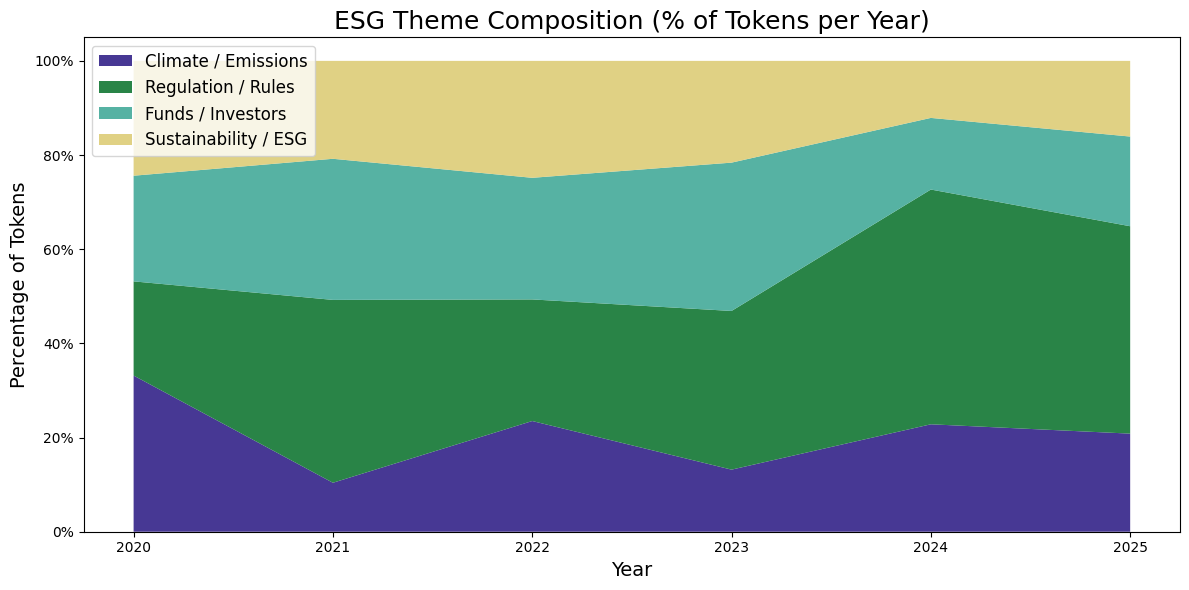

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Distinct, colorblind-friendly palette
colors = [
    "#332288",  # Climate / Emissions
    "#117733",  # Regulation / Rules
    "#44AA99",  # Funds / Investors
    "#DDCC77"   # Sustainability / ESG
]

plt.figure(figsize=(12, 6))

plt.stackplot(
    years,
    theme_pct["Climate / Emissions"],
    theme_pct["Regulation / Rules"],
    theme_pct["Funds / Investors"],
    theme_pct["Sustainability / ESG"],
    labels=[
        "Climate / Emissions",
        "Regulation / Rules",
        "Funds / Investors",
        "Sustainability / ESG"
    ],
    colors=colors,
    alpha=0.9
)

plt.title("ESG Theme Composition (% of Tokens per Year)", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Percentage of Tokens", fontsize=14)

# Format y-axis as 0–100%
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

plt.legend(loc="upper left", fontsize=12)
plt.tight_layout()
plt.show()


## 🎨 Visualizing TF–IDF: Word Cloud & Temporal Trend

Now that we’ve mapped speeches in abstract “TF–IDF space,”  
let’s explore two other ways to *see* what TF–IDF tells us.

1. **Word Cloud** – visually emphasizes the distinctive words in one speech.  
   - Larger words = higher TF–IDF scores.  
   - Great for quick, qualitative insight into what stands out.

2. **Temporal Line Chart** – tracks how the importance of a given term changes over time.  
   - Example: does *“freedom”* rise or fall in salience across U.S. history?


In [ ]:
# --- 1) Word Cloud for a Selected Speech ---
from wordcloud import WordCloud

# Pick a speech by index (0=earliest, -1=latest)
doc_idx = len(df) - 1  # last speech by default

# Generate dictionary of top TF–IDF terms
wc_data = dict(top_tfidf_terms_for_doc(doc_idx, top_n=100))

# Create and display the word cloud
wc = WordCloud(width=800, height=400, background_color='white')
wc.generate_from_frequencies(wc_data)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title(f"Word Cloud: {df.loc[doc_idx,'year']} – {df.loc[doc_idx,'president']}", fontsize=14)
plt.show()



In [ ]:
# --- 2) Temporal Line Chart of a Word's TF–IDF Weight ---
# Choose a term to track over time
term = "freedom"  # try swapping to 'war', 'peace', 'america', etc.

if term in terms:
    term_idx = np.where(terms == term)[0][0]
    df[f"tfidf_{term}"] = X_tfidf[:, term_idx].toarray().ravel()

    plt.figure(figsize=(8,4))
    plt.plot(df['year'], df[f"tfidf_{term}"], marker='o', linestyle='-')
    plt.title(f'TF–IDF Weight of "{term}" Over Time', fontsize=14)
    plt.xlabel("Year of Inaugural Address")
    plt.ylabel("TF–IDF Score")
    plt.grid(alpha=0.3)
    plt.show()
else:
    print(f'Term "{term}" not found in vocabulary. Try another word.')


> ✅ **What TF–IDF tells us**: which words uniquely characterize each speech; which speeches use similar vocabularies.  
> ❌ **What it doesn’t**: explicitly uncover *themes* shared across documents.



## 7) Topic Modeling with scikit‑learn’s LDA
**Latent Dirichlet Allocation (LDA)** models each document as a mixture of **topics** (word distributions).  
We’ll build a bag‑of‑words matrix, fit an LDA model, inspect topics, and examine per‑speech topic mixtures.


In [ ]:

# Bag-of-words for LDA
  # CountVectorizer converts each document into a bag-of-words (word counts, not weights).
  # min_df=2 means: ignore words that appear in fewer than 2 speeches (to reduce noise).
  # fit_transform() builds the vocabulary and creates a document-term matrix: Rows = speeches; Columns = unique words; Values = how many times each word appears
  # vocab holds the list of all words (for displaying topic terms later).

cv = CountVectorizer(min_df=2)
X_counts = cv.fit_transform(df['text_clean'])
vocab = np.array(cv.get_feature_names_out())

# Train LDA
  # K is the number of topics you want the model to find.
  # This is not learned automatically — it’s a parameter you choose.
  # Try experimenting with different values:
    # K=5 → broader, more general themes (e.g., “war,” “economy,” “unity”).
    # K=8 → more nuanced topics (e.g., “foreign policy,” “domestic economy,” “liberty”).

K = 8  # adjust live (5, 8, 12)


# Initializes the LDA model from scikit-learn.
  # n_components=K → tells the model how many topics (components) to find.
  # learning_method="batch" → trains on the entire dataset at once.
  # (Alternative: "online" trains incrementally on chunks; “batch” is stable for small corpora like this.)
  # random_state=42 → ensures reproducible results (so every student gets the same topics).
  # max_iter=20 → number of passes over the data to improve the model; more iterations = more refined topics, but slower training.

lda = LatentDirichletAllocation(
    n_components=K,
    learning_method="batch",
    random_state=42,
    max_iter=20
)

# This line fits the model and simultaneously transforms the data into topic proportions
topic_mix = lda.fit_transform(X_counts)  # theta: (n_docs, K)

def show_topics(model, vocab, topn=12):
# Defines a helper function called show_topics().
# Inputs:
  # model → your trained LDA model (lda).
  # vocab → array of all words in your vocabulary (from CountVectorizer).
  # topn → how many top words you want to display per topic (default = 12).
    for k, comp in enumerate(model.components_):
    # model.components_ is a 2D NumPy array where:
    # Each row corresponds to a topic (Topic 0, Topic 1, …).
    # Each column corresponds to a word in the vocabulary.
    # Each value = the importance (weight) of that word within the topic.
    # enumerate() loops through all topics (k) and their corresponding word-weight vectors (comp).
        top_idx = comp.argsort()[::-1][:topn]
        # argsort() returns the indices that would sort the array — here, the word weights — in ascending order.
        # [::-1] reverses that order to descending (highest-weighted words first).
        # [:topn] takes only the top n indices (e.g., top 12 words).
        print(f"\nTopic {k}: " + ", ".join(vocab[top_idx]))

show_topics(lda, vocab, topn=12)

# Assemble per-document topic proportions
topic_df = pd.DataFrame(topic_mix, columns=[f"topic_{k}" for k in range(K)])
result_df = pd.concat([df[['fileid','year','president']], topic_df], axis=1)
result_df.head(5)


### Map the topics across a heatmap

🧠 How to Interpret the LDA Topic Heatmap

Each cell of the heatmap represents the proportion of a given topic within a specific speech.
Color intensity encodes how strongly that topic appears — darker (or brighter) = higher proportion, lighter = weaker presence.

In [ ]:
!pip -q install plotly

import numpy as np
import plotly.graph_objects as go


In [ ]:
def topic_top_words(lda_model, vocab, topn=10):
    """Return:
       - topic_labels: list like ["T0: economy, growth, jobs", ...]
       - topic_words:  list of lists of the topn words per topic (for hover)
    """
    labels = []
    words_list = []
    for k, comp in enumerate(lda_model.components_):
        top_idx = comp.argsort()[::-1][:topn]
        words = vocab[top_idx].tolist()
        words_list.append(words)
        label = f"T{k}: " + ", ".join(words[:6])  # concise label for axis/hover
        labels.append(label)
    return labels, words_list

topic_labels, topic_words = topic_top_words(lda, vocab, topn=12)

# Columns in result_df that are topic proportions
topic_cols = [c for c in result_df.columns if c.startswith("topic_")]


In [ ]:
# Pick rows you want to compare
rows = [0, len(result_df)//2, len(result_df)-1] #The list [0, len(result_df)//2, len(result_df)-1] = [first_speech, middle_speech, last_speech]
df_sel = result_df.iloc[rows].copy()

# This code converts the selected speeches’ topic proportions into a NumPy matrix (Z) for plotting,
# creates x-axis labels (x) showing topic numbers (like “T0”, “T1”, …), and builds y-axis labels (y)
# combining each speech’s year and president name for the heatmap
Z = df_sel[topic_cols].to_numpy()
x = [f"T{int(c.split('_')[-1])}" for c in topic_cols]
y = [f"{r.year} — {r.president}" for _, r in df_sel.iterrows()]

# Build hovertext matrix: one string per cell
hovertext = []
for r_i, r in df_sel.iterrows():
    row_texts = []
    for t_i, col in enumerate(topic_cols):
        k = int(col.split('_')[-1])
        row_texts.append(
            f"<b>{int(r.year)} — {r.president}</b><br>"
            f"<b>Topic {k}</b><br>"
            f"Top words: {', '.join(topic_words[k][:10])}<br>"
            f"Proportion: {r[col]:.3f}"
        )
    hovertext.append(row_texts)

fig = go.Figure(
    data=go.Heatmap(
        z=Z,
        x=x,
        y=y,
        colorscale="Plasma",
        zmin=0.0, zmax=1.0,
        hoverinfo="text",
        text=hovertext
    )
)
fig.update_layout(
    title="Topic mixture (theta) — selected speeches",
    xaxis_title="Topic",
    yaxis_title="Speech",
    height=300 + 40*len(rows),
    margin=dict(l=80, r=20, t=60, b=60)
)
fig.show()


In [ ]:
# Ensure chronological order
df_sorted = result_df.sort_values("year").reset_index(drop=True)

# Reorder topics by global prevalence (more interpretable)
mean_by_topic = df_sorted[topic_cols].mean(axis=0).to_numpy()
order = np.argsort(mean_by_topic)[::-1]
ordered_cols = [topic_cols[i] for i in order]
ordered_x = [f"T{int(c.split('_')[-1])}" for c in ordered_cols]

A = df_sorted[ordered_cols].to_numpy()
y_all = df_sorted["year"].astype(str) + " — " + df_sorted["president"]

# Hovertext matrix for all speeches
hovertext_all = []
for r_i, r in df_sorted.iterrows():
    row_texts = []
    for c in ordered_cols:
        k = int(c.split('_')[-1])
        row_texts.append(
            f"<b>{int(r['year'])} — {r['president']}</b><br>"
            f"<b>Topic {k}</b><br>"
            f"Top words: {', '.join(topic_words[k][:10])}<br>"
            f"Proportion: {r[c]:.3f}"
        )
    hovertext_all.append(row_texts)

fig_all = go.Figure(
    data=go.Heatmap(
        z=A,
        x=ordered_x,
        y=y_all,
        colorscale="Plasma",
        zmin=0.0, zmax=1.0,
        hoverinfo="text",
        text=hovertext_all
    )
)
fig_all.update_layout(
    title="All speeches — topic mixture heatmap (topics ordered by prevalence)",
    xaxis_title="Topic",
    yaxis_title="Speech (year — president)",
    height=max(450, 14*len(df_sorted)),
    margin=dict(l=120, r=20, t=60, b=80)
)
fig_all.show()



## 8) TF–IDF vs LDA — Compare & Contrast
| Aspect | TF–IDF | LDA (Topics) |
|---|---|---|
| Unit | Terms per document | Topics (word dists); documents are mixtures |
| Great for | Keywording, distinctiveness, similarity | Thematic mapping across corpus |
| Limitations | No explicit themes | Needs K tuning; topics can blend/split |


## 9) 🎯 Student-Driven Policy Exploration (≈60 minutes)

Work in pairs. Your mission: **choose a policy area**, **build a small text corpus**, and **experiment** with TF–IDF and topic modeling to discover what language patterns define that space.

This is not a graded deliverable — it’s a sandbox for exploration, pattern-finding, and discussion.

---

### 🧭 Part A — Choose a Policy Area
Pick an issue you care about — examples:

- Climate policy & sustainability  
- Immigration & border security  
- Health care & public health  
- Economic growth & inequality  
- Civil rights & social justice  
- Foreign policy & diplomacy  

Then brainstorm: *Whose language represents this issue?*  
(e.g., presidents, UN leaders, legislators, NGOs, media outlets).

---

### 📚 Part B — Build Your Corpus

You’ll need at least **10–20 short to medium speeches or statements**.

**Option 1 – Use existing open archives**
- U.S. presidential speeches: [American Presidency Project](https://www.presidency.ucsb.edu/speeches)
- UN General Assembly statements: [UN Digital Library](https://digitallibrary.un.org/)
- EU or UK parliament debates: [Hansard](https://hansard.parliament.uk/), [Europarl](https://www.europarl.europa.eu/)
- NGO or think-tank reports: World Bank, IMF, WHO, Brookings, RAND, etc.

**Option 2 – Scrape or collect your own (advanced)**
- Use `requests` + `BeautifulSoup` or a library such as `newspaper3k` to extract text.
- Or copy/paste short excerpts into `.txt` files and upload them to Colab.

📎 *Hint:* keep your text clean — remove headers, speaker names, and references.

See script below to get you started

---

### 🧩 Part C — Explore Frequency, TF–IDF, and Topics

1. **Frequency snapshot:**  
   Compute the top 15 most common words (`FreqDist`). Which ones are generic boilerplate (e.g., “people,” “government”)?

2. **Distinctiveness check:**  
   Run **TF–IDF** with `min_df=2` or `min_df=5`.  
   - Which words rise to the top?  
   - What do they reveal about your policy domain’s unique framing?

3. **Similarity sleuthing:**  
   Using cosine similarity on TF–IDF vectors, find which two documents are most similar.  
   What links them — era, country, tone?

4. **Topic discovery:**  
   Train an **LDA model** (try `K=5`, `K=8`, `K=12`).  
   - Label each topic in 2–3 words.  
   - Which `K` feels most interpretable?  
   - Do your topics align with known sub-issues (e.g., “energy transition,” “human rights,” “trade policy”)?

5. **Visualize:**  
   Create a PCA or heatmap of your documents.  
   - What clusters appear?  
   - Does time, geography, or institution explain them?

---

### 🕵️ Part D — Mini Scavenger Hunt Prompts

- **“Word Detective”**: Which words define your corpus when using TF–IDF vs raw frequency?  
- **“Similarity Sleuth”**: Which two documents look similar numerically but differ substantively?  
- **“Topic Whisperer”**: Choose one topic from your LDA output. Find two speeches that heavily feature it (> 0.3). What do they share?  
- **“Era Shift”**: Does any topic fade or grow over time? What might explain it?  
- **“Headline Writer”**: Summarize one document twice — once using TF–IDF terms, once using its dominant LDA topic. How do the headlines differ in tone?

---

### 🧠 Part E — Policy Reflection (Discussion, not submission)

Compare what each method tells you:

| Method | Reveals | Best for |
|---------|----------|----------|
| **TF–IDF** | Distinctive vocabulary per document | Comparing actors or countries |
| **LDA (Topic Modeling)** | Underlying shared themes | Tracking issue clusters and framing evolution |

> In your discussion:  
> - What language dominates your policy area?  
> - Whose framing or rhetoric stands out?  
> - How might these tools support evidence-based policy analysis?

---

✅ **Outcome:** You should be able to *talk through* what you learned —
not produce a written report. Your goal is pattern recognition, curiosity, and connecting computational text analysis to real policy discourse.


In [ ]:
# =======================================================
# 🧭 STEP 1: Mount Google Drive
# =======================================================
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# =======================================================
# 🗂 STEP 2: Create a folder in Google Drive for text corpus
# =======================================================
import os

# Customize the folder name — each student can use their initials or topic
folder_name = "policy_corpus"
drive_path = "/content/drive/MyDrive"
corpus_dir = os.path.join(drive_path, folder_name)

os.makedirs(corpus_dir, exist_ok=True)
print(f"✅ Folder ready: {corpus_dir}")


In [ ]:
# =======================================================
# 📰 STEP 3: Scrape Articles with newspaper3k and Save as .txt
# =======================================================

!pip install newspaper3k lxml_html_clean --quiet
# !pip -q install newspaper3k lxml_html_clean

# Import after successful install
from newspaper import Article



import time, os, requests
from newspaper import Article, Config

HEADERS = {
    "User-Agent": (
        "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/123.0.0.0 Safari/537.36"
    ),
    "Accept-Language": "en-US,en;q=0.9",
}

cfg = Config()
cfg.browser_user_agent = HEADERS["User-Agent"]
cfg.request_timeout = 20
cfg.memoize_articles = False

def extract_with_newspaper(url: str) -> str:
    """Try Newspaper with real UA; if download() gets 403, use requests + set_html()."""
    art = Article(url, config=cfg)
    try:
        art.download()              # may 403
        art.parse()
        return art.text.strip()
    except Exception:
        # Fallback: fetch with requests using real headers, then feed raw HTML to Newspaper
        r = requests.get(url, headers=HEADERS, timeout=30)
        r.raise_for_status()        # will throw if not 200 (but you said it's 200)
        art = Article(url, config=cfg)
        art.set_html(r.text)
        art.parse()
        return art.text.strip()



import pathlib
SAVE_DIR = pathlib.Path("/content/drive/MyDrive/policy_corpus")
SAVE_DIR.mkdir(parents=True, exist_ok=True)

def safe_filename(title: str, i: int) -> str:
    base = "".join(c for c in title if c.isalnum() or c in (" ","_")).strip().replace(" ","_")
    if not base: base = f"article_{i}"
    return f"{i:02d}_{base[:60]}.txt"

def extract_article(url: str, i: int) -> str:
    # Try Newspaper (UA) → Newspaper with requests HTML → Trafilatura
    try:
        text = extract_with_newspaper(url)
        source = "newspaper3k"
    except Exception as e1:
        try:
            text = extract_with_trafilatura(url)
            source = "trafilatura"
        except Exception as e2:
            raise RuntimeError(f"Both extractors failed.\nNewspaper err: {e1}\nTrafilatura err: {e2}")
    return text, source

def save_article(urls):
    import datetime
    for i, url in enumerate(urls, start=1):
        try:
            text, source = extract_article(url, i)
            title_hint = url.split("/")[-2] if "/" in url else "article"
            fname = safe_filename(title_hint, i)
            fpath = SAVE_DIR / fname
            with open(fpath, "w", encoding="utf-8") as f:
                f.write(f"URL: {url}\n")
                f.write(f"SourceExtractor: {source}\n")
                f.write(f"SavedAtUTC: {datetime.datetime.utcnow().isoformat()}Z\n\n")
                f.write(text)
            print(f"✅ Saved ({source}): {fname}")
            time.sleep(1.0)  # be polite
        except Exception as e:
            print(f"⚠️ Skipped {url}: {e}")

# EXAMPLE URLS (swap in your policy-area links)
urls = [
  "https://www.un.org/sg/en/content/sg/statements/2025-11-08/secretary-generals-message-the-20th-conference-of-youth-climate-change",
    "https://www.un.org/sg/en/content/sg/statements/2025-11-07/secretary-generals-remarks-the-belem-climate-summit-energy-transition-roundtable-delivered",
    "https://www.un.org/sg/en/content/sg/statements/2025-11-06/secretary-generals-remarks-the-launch-of-the-tropical-forest-forever-facility-delivered",
]
save_article(urls)
print("Folder:", SAVE_DIR)


In [ ]:
# =======================================================
# 🧾 STEP 4: Verify Saved Files
# =======================================================
import glob

files = sorted(glob.glob(os.path.join(corpus_dir, "*.txt")))
print(f"Found {len(files)} text files in Drive.")
for f in files:
    print("-", os.path.basename(f))



---

### Closing Thought
**FreqDist** shows what’s loudest. **TF–IDF** shows what’s distinctive. **LDA** shows what’s thematic. Use all three to triangulate insights for public‑policy questions.
